In [14]:
from pycgp import CGP, CGPES, Evaluator, MaskEvaluator
from pycgp.ipfunctions import *
import pandas as pd
import sys
import time


# CGP and evolution parameters

In [15]:
col=30
row=1
nb_ind=5
mutation_rate_nodes=0.15
mutation_rate_outputs=0.3
n_it=1000
genome=None

# Function lib

In [16]:
library = build_funcLib()

# Dataset infos

In [51]:
dirname = 'datasets/coins/'
dataset_name = 'dataset.csv'

# Starting evolution

In [59]:
e = MaskEvaluator(dirname = dirname,
                  dataset_name = dataset_name,
                  display_dataset=False,
                  resize = 0.25,
                  include_hsv = False,
                  include_hed = False,
                  number_of_evaluated_images=-1)

In [60]:
if genome is None:
    cgpFather = CGP.random(num_inputs=e.n_inputs, num_outputs=e.n_outputs, 
                           num_cols=col, num_rows=row, library=library, 
                           recurrency_distance=1.0, recursive=False, 
                           const_min=0, const_max=255, 
                           input_shape=e.input_channels[0][0].shape, dtype='uint8')
else:

    
    cgpFather = CGP.load_from_file(genome, library)

output_dirname = dirname+'evos/run_'+str(round(time.time() * 1000000))
print("Starting evolution. Genomes will be saved in: "+ output_dirname)
es = CGPES(nb_ind, mutation_rate_nodes, mutation_rate_outputs, cgpFather, e, output_dirname)
es.run(n_it)

Starting evolution. Genomes will be saved in: datasets/melanoma/evos/run_1748347804840274
1 	 0.3512228828212873 	 True 	 [0.35122288 0.         0.         0.35122288 0.05330863]
2 	 0.3512228828212873 	 True 	 [0.05330863 0.35122288 0.05330863 0.05330863 0.13702877]
3 	 0.3512228828212873 	 True 	 [0.35122288 0.05330863 0.05330863 0.03192077 0.35122288]
4 	 0.3512228828212873 	 True 	 [0.35122288 0.05328214 0.05330863 0.05330863 0.35122288]
5 	 0.3512228828212873 	 True 	 [0.35122288 0.05330863 0.35122288 0.35122288 0.35122288]


/home/cussat/pyCGP/pyCGP/pycgp/ipfunctions.py:331: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kur = np.mean(kurtosis(img, fisher=True))
/home/cussat/pyCGP/pyCGP/pycgp/ipfunctions.py:332: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew1 = np.mean(skew(img))


6 	 0.3512228828212873 	 True 	 [0.35122288 0.35122288 0.05330863 0.01873025 0.        ]
7 	 0.3512228828212873 	 True 	 [0.05330863 0.35122288 0.35122288 0.         0.        ]
8 	 0.3695404702100838 	 True 	 [0.05330863 0.36954047 0.35122288 0.35122288 0.05323655]
9 	 0.3695404702100838 	 True 	 [0.36954047 0.05330863 0.36954047 0.0056303  0.        ]
10 	 0.3695404702100838 	 True 	 [0.36954047 0.05330863 0.         0.05330863 0.        ]
11 	 0.3695404702100838 	 True 	 [0.36954047 0.36954047 0.36954047 0.         0.36954047]
12 	 0.3695404702100838 	 True 	 [0.         0.36954047 0.36954047 0.2678251  0.36954047]
13 	 0.3695404702100838 	 True 	 [0.36954047 0.36954047 0.34603307 0.02067557 0.05330863]
14 	 0.3695404702100838 	 True 	 [0.         0.05330863 0.05330863 0.36954047 0.05330863]
15 	 0.3695404702100838 	 True 	 [0.26196108 0.         0.36954047 0.36954047 0.36954047]
16 	 0.3695404702100838 	 True 	 [0.05330863 0.36954047 0.05330863 0.05330863 0.        ]
17 	 0.3695404

/home/cussat/pyCGP/pyCGP/pycgp/ipfunctions.py:297: RuntimeWarning: invalid value encountered in cast
  return cv2.Sobel(args[0], cv2.CV_64F, 0, 1, ksize=ksize).astype(np.uint8)


45 	 0.5674225949681132 	 True 	 [0.56742259 0.01508988 0.05330887 0.26034759 0.23920172]
46 	 0.5674225949681132 	 False 	 [0.05330863 0.         0.26196108 0.05330863 0.00030514]
47 	 0.5674225949681132 	 False 	 [0.10293463 0.15445313 0.05276608 0.52099569 0.29290087]
48 	 0.5674225949681132 	 False 	 [0.56454009 0.05330863 0.54780773 0.32977811 0.        ]
49 	 0.5674225949681132 	 False 	 [0.05161682 0.05330863 0.0530109  0.03996286 0.54072206]
50 	 0.5674225949681132 	 False 	 [0.00075817 0.05335862 0.2108193  0.05330863 0.05330863]
51 	 0.5674225949681132 	 True 	 [0.07918834 0.05330863 0.00994934 0.56742259 0.05340656]
52 	 0.5674225949681132 	 False 	 [0.05330863 0.05330863 0.01235564 0.53389978 0.20637058]
53 	 0.5674225949681132 	 True 	 [0.00389433 0.56742259 0.05330863 0.2579571  0.53333201]
54 	 0.5674225949681132 	 False 	 [0.05330863 0.053303   0.05243607 0.31719075 0.05296978]
55 	 0.5674225949681132 	 True 	 [0.56742259 0.00368932 0.56246985 0.01154324 0.52468465]
56 

/home/cussat/pyCGP/pyCGP/pycgp/ipfunctions.py:296: RuntimeWarning: invalid value encountered in cast
  return cv2.Sobel(args[0], cv2.CV_64F, 1, 0, ksize=ksize).astype(np.uint8)


88 	 0.5837738933140365 	 False 	 [0.39669601 0.26069381 0.05330863 0.26034759 0.05330863]
89 	 0.5837738933140365 	 True 	 [0.27543694 0.50780911 0.05274162 0.05330863 0.58377389]
90 	 0.5837738933140365 	 True 	 [0.01382895 0.27462867 0.55587471 0.58377389 0.57220285]
91 	 0.5837738933140365 	 False 	 [5.78675960e-01 5.33086329e-02 2.60225425e-01 5.33086329e-02
 3.90042638e-04]
92 	 0.5837738933140365 	 False 	 [0.05330863 0.5175712  0.00115315 0.05330863 0.05330863]
93 	 0.5837738933140365 	 False 	 [0.01413694 0.05330863 0.09380598 0.2104563  0.50573466]
94 	 0.5837738933140365 	 True 	 [0.58377389 0.58377389 0.00917378 0.58377389 0.58377389]
95 	 0.5837738933140365 	 True 	 [0.00125579 0.         0.58377389 0.17581339 0.22772342]
96 	 0.5837738933140365 	 True 	 [0.2848641  0.05330863 0.50611232 0.12989046 0.58377389]
97 	 0.5837738933140365 	 True 	 [0.25827422 0.25827422 0.57867596 0.51525612 0.58377389]
98 	 0.5837738933140365 	 True 	 [0.00268604 0.14110085 0.58377389 0.423527

KeyboardInterrupt: 

# Display the obtained masks

In [54]:
import matplotlib.pyplot as plt

In [55]:
best_cgp = es.father

In [56]:
img_index = 1
img_source = e.input_channels[img_index]
mask_gt = e.target_masks[img_index][0]
mask_cgp = best_cgp.run(img_source)[0]

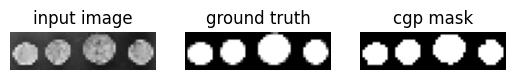

In [57]:
fig, axes = plt.subplots(1, 3)
axes[0].imshow(np.transpose(img_source, (1, 2, 0)))
axes[0].set_title('input image')
axes[0].axis('off')
axes[1].imshow(mask_gt, cmap='gray')
axes[1].set_title('ground truth')
axes[1].axis('off')
axes[2].imshow(mask_cgp, cmap='gray')
axes[2].set_title('cgp mask')
axes[2].axis('off')
plt.show()

# Display and evaluation of the best individual

In [50]:
es.father.to_function_string(['ch_'+str(i) for i in range(e.n_inputs)], ['mask_'+str(i) for i in range(e.n_outputs)])


'mask_0 = f_fill_holes(f_binary_in_range(f_bitwise_not(f_pyr(ch_0, 54)), 53, 225));'

In [21]:
e.evaluate(es.father, 0, True)

mask_0 = f_remove_small_holes(f_threshold_otsu(f_max(f_square_root(f_threshold_at_1(ch_2, 182)), f_threshold_at_1(ch_2, 182))), 165);


error: OpenCV(4.7.0) /opencv-4.7.0/modules/highgui/src/window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [24]:
import os
es.father.to_dot('cgp_graph.dot', ['ch_'+str(i) for i in range(e.n_inputs)], ['mask_'+str(i) for i in range(e.n_outputs)])
#os.system('dot -Tpdf cgp_graph.dot -o cgp_graph.pdf')
#os.system('rm cgp_graph.dot')

render the graph with [this site](https://dreampuf.github.io/GraphvizOnline)